Station, Type, HD-Strength, Angle DataSize Linearity
BLKN, 2-lobed, 0.17, 82.88994015901181, 53, 0.19
BLKN, 4-lobed, 0.19, 68.00922644712273, 53, 0.39
BULN, 2-lobed, 0.27, 57.93075258729027, 10, 0.55
BULN, 4-lobed, 0.17, 47.77248653549003, 10, 0.71
CNF, 2-lobed, 0.37, 96.79650051872142, 12, 0.13
CNF, 4-lobed, 0.38, 76.51634303865205, 12, 0.92
CTSN, 2-lobed, 0.23, 67.40673951821913, 12, 0.50
CTSN, 4-lobed, 0.32, 124.35681884958825, 12, 0.80
DORN, 2-lobed, 0.35, 97.93104893703423, 35, 0.29
DORN, 4-lobed, 0.34, 88.38410837381451, 35, 0.83
FCC, 2-lobed, 0.22, 28.205456920918664, 19, 0.88
FCC, 4-lobed, 0.21, 114.99106462179287, 19, 0.79
ILON, 2-lobed, 0.52, 122.60124750877293, 6, 0.69
ILON, 4-lobed, 0.94, 86.56665192024707, 6, 0.96
KUGN, 2-lobed, 0.25, 131.51330275637878, 17, 0.84
KUGN, 4-lobed, 0.28, 64.922975019675, 17, 0.43
MANN, 2-lobed, 0.34, 51.58238681949342, 14, 0.78
MANN, 4-lobed, 0.23, 107.06965034321172, 14, 0.39
MCMN, 2-lobed, 0.16, 81.93559401948181, 7, 0.29
MCMN, 4-lobed, 0.22

/Users/sina/Desktop/RFCAN/rfcan/codes_RF/HDPM.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=5, sharey = True, figsize=(4,4))


QILN, 2-lobed, 0.18, 65.8971476952334, 26, 0.86
QILN, 4-lobed, 0.23, 57.159075210858305, 26, 0.78
SAKN, 2-lobed, 0.26, 56.34686817076363, 18, 0.56
SAKN, 4-lobed, 0.15, 109.28966258598041, 18, 0.46
SHWN, 2-lobed, 0.26, 54.9856104391132, 18, 0.70
SHWN, 4-lobed, 0.15, 87.31762960222204, 18, 0.41
SMLN, 2-lobed, 0.20, 106.30713757081753, 4, 0.28
SMLN, 4-lobed, 0.35, 66.44230954727061, 4, 0.79
SRLN, 2-lobed, 0.21, 67.7578293714048, 17, 0.38
SRLN, 4-lobed, 0.20, 116.16840840054721, 17, 0.92


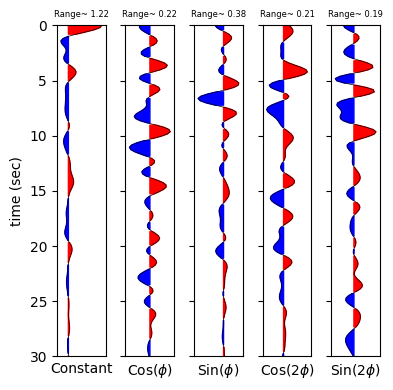

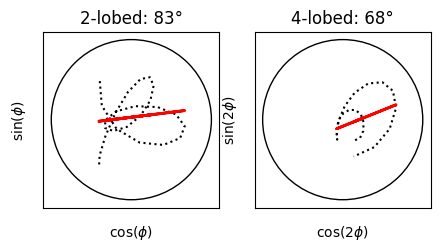

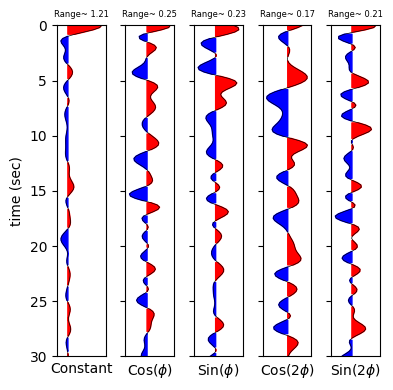

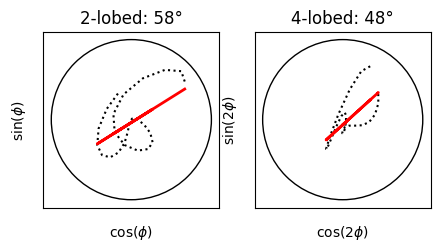

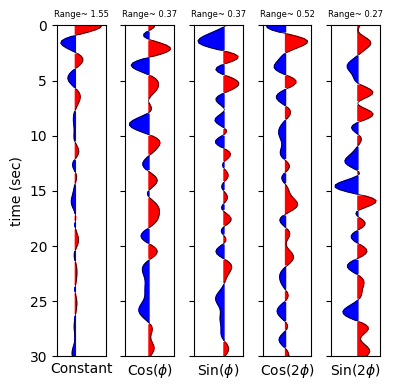

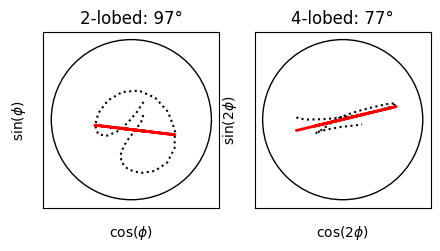

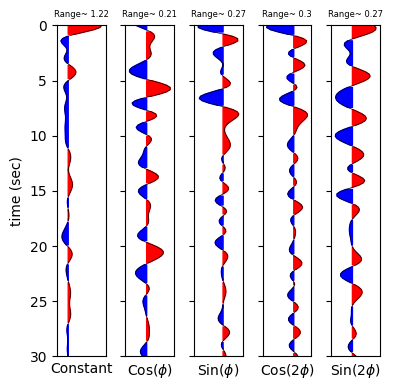

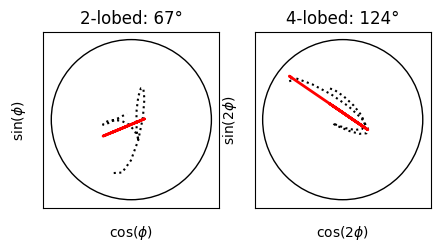

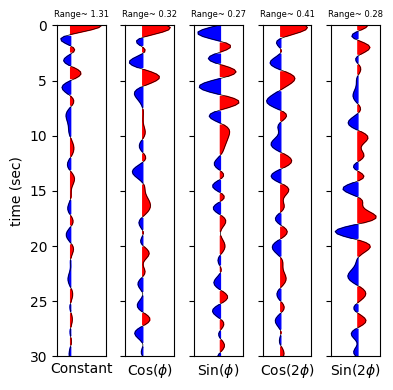

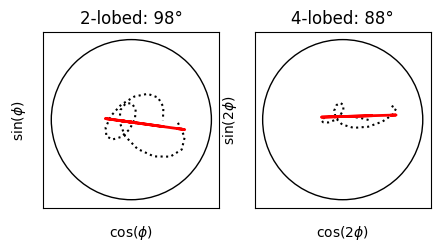

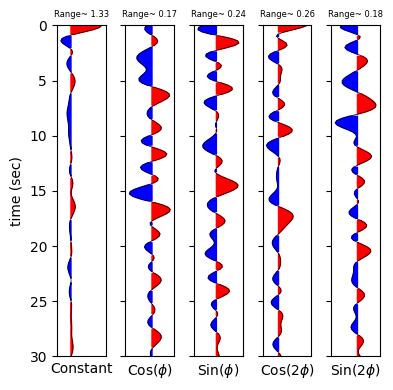

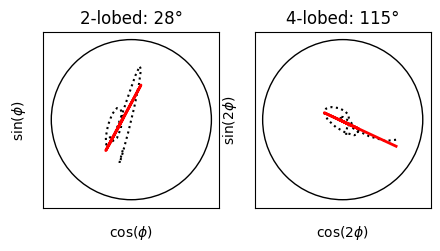

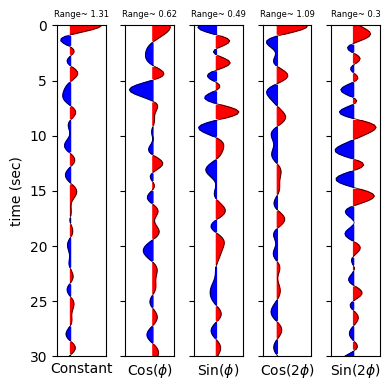

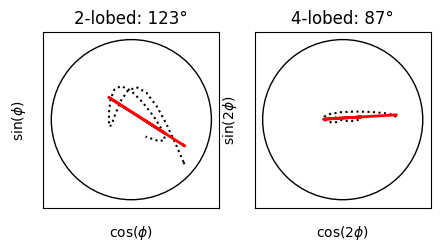

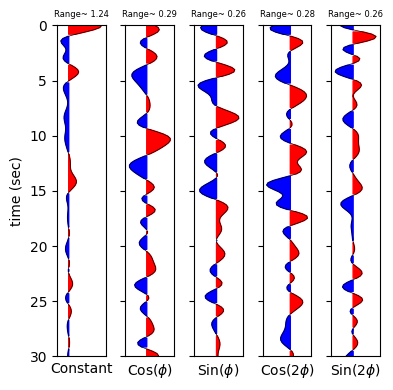

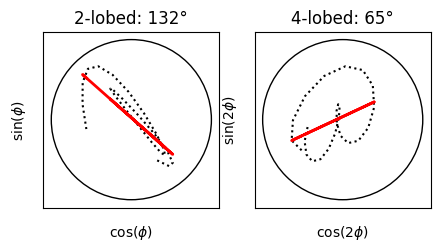

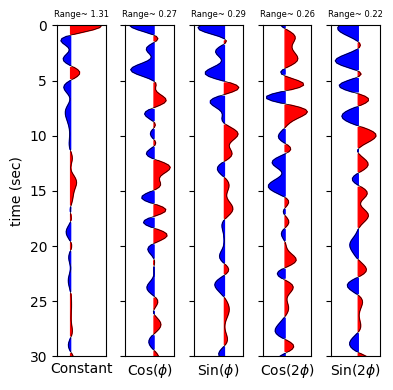

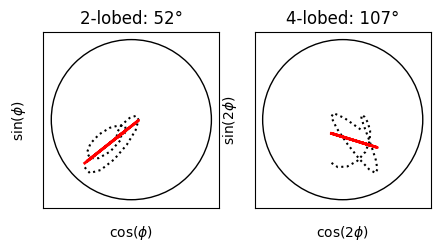

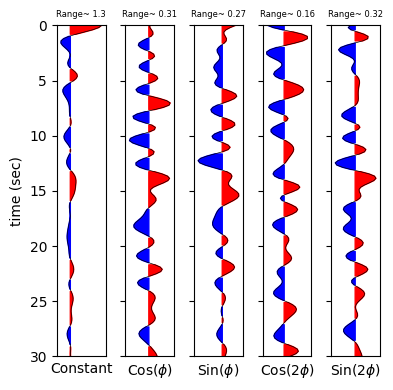

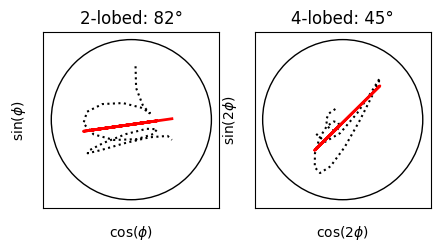

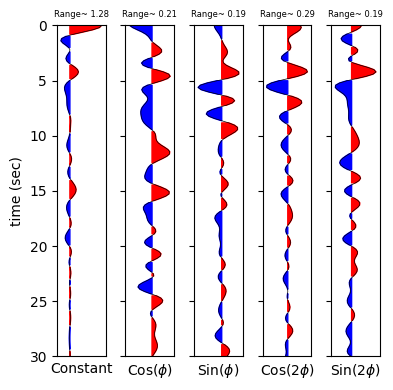

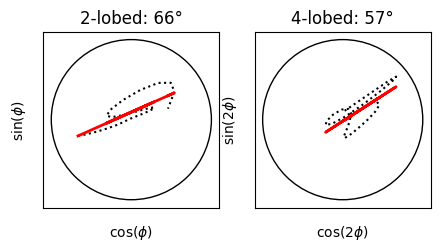

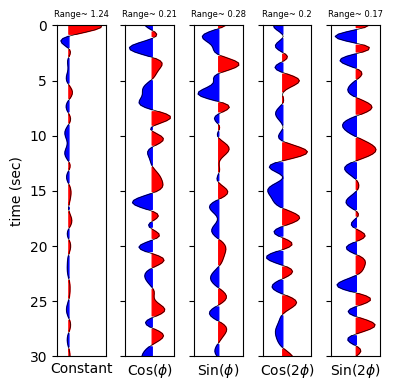

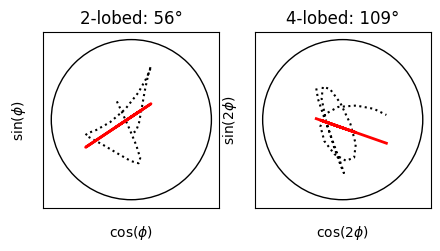

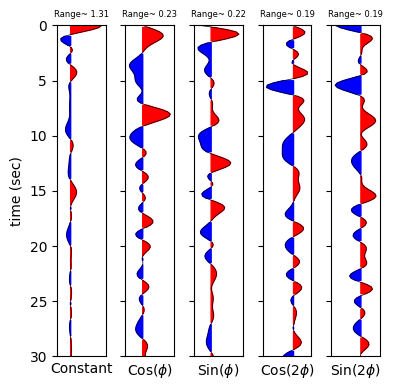

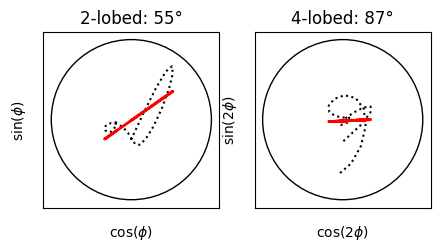

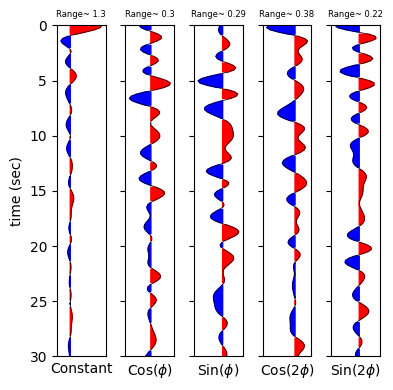

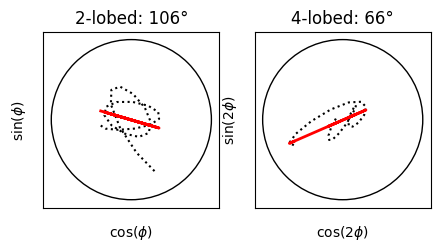

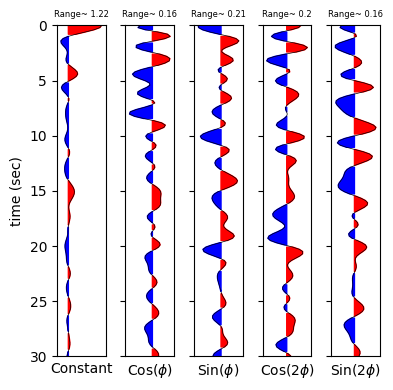

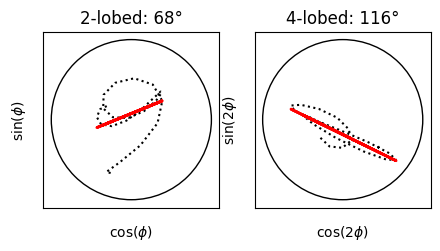

In [1]:
import pandas as pd
from codes_RF.HDPM import info_extract, harmonic_decomp, particlemotion

stations = ["BLKN","BULN","CNF","CTSN","DORN","FCC","ILON","KUGN","MANN","MCMN","QILN","SAKN","SHWN","SMLN","SRLN"]
# stations = stations[0:2]
print("Station, Type, HD-Strength, Angle", "DataSize", "Linearity") #to make an table like output
for station in stations:
    station = station.upper()
    wave_df = pd.read_csv("DATA/waveforms_list.csv")
    wave_df = wave_df[(wave_df["sta_code"] == station) & (wave_df["rf_quality"] == 1)]
    wave_list = [f"DATA/RF/{i}.pkl" for i in wave_df["file_name"]]
    # print(f"stations: {station}")


    wave, G, datasize = info_extract(wave_list)
    m = harmonic_decomp(wave, G)
    address = "Results/HARMINIC_DECOMP/ParticleMotion" # saving folder
    particlemotion(m, type="2-lobed", xmin=0, xmax=5, save_folder=address, station=station, datasize=datasize)